# Cargamos los datos

In [57]:
import fastai
import torch
from fastai.vision import *
from shutil import copyfile
import random
import pandas as pd
import numpy as np
plt.rcParams.update({'font.size': 16})





Validando el ``test_set``






In [58]:
folder_classes = '/shared/Classification_Clinic_Balanced'

In [63]:

data_test = (ImageList.from_folder(folder_classes) #Where to find the data? -> in path and its subfolders
        .split_by_folder(train='train', valid='test')       #How to split in train/valid? -> use the folders
        .label_from_folder()    
        .transform(size=224)     
        .databunch(num_workers=0,)
        .normalize(imagenet_stats)
       )   



In [64]:
data_test

ImageDataBunch;

Train: LabelList (2649 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BLAST,BLAST,BLAST,BLAST,BLAST
Path: /shared/Classification_Clinic_Balanced;

Valid: LabelList (264 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
BLAST,BLAST,BLAST,BLAST,BLAST
Path: /shared/Classification_Clinic_Balanced;

Test: None

In [65]:
valid_ds = data_test.valid_ds.to_df()
pd.DataFrame(valid_ds['y'].value_counts()).rename(columns={'y':'Conteo de clases en test set'})

,Conteo de clases en test set
VARIANT_LYMPHOCYTE,102
BLAST,93
ATYPICAL_LYMPHOCYTE,69


# Test en Clinic de ResNet 34 (Santi) NoSind

In [66]:
folder_models = "/shared/modelos"

In [67]:
learn = None
learn = load_learner(folder_models, 'export_Resnet34_3types_BAL_resampling_NoLGL_NoSIND.pkl')


    

/opt/conda/envs/fastai/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'fastai.layers.AdaptiveConcatPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/opt/conda/envs/fastai/lib/python3.6/site-packages/torch/serialization.py:434: SourceChangeWarning: source code of class 'fastai.layers.Flatten' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [68]:
learn.data.classes = ['ATYPICAL_LYMPHOCYTE', 'BLAST', 'VARIANT_LYMPHOCYTE']

In [71]:
learn.data.classes
learn.data = data_test

In [72]:
gc.collect()

Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/envs/fastai/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._

6165

In [73]:
learn.data.batch_size = 20


In [74]:
results = learn.validate(data_test.valid_dl)

valid_CanRuti = dict(zip(['valid_loss',  'accuracy'],
                         [results[0], results[1].item()]))

pd.DataFrame(valid_CanRuti, index = ['metrics'])

,valid_loss,accuracy
metrics,0.067045,0.984848


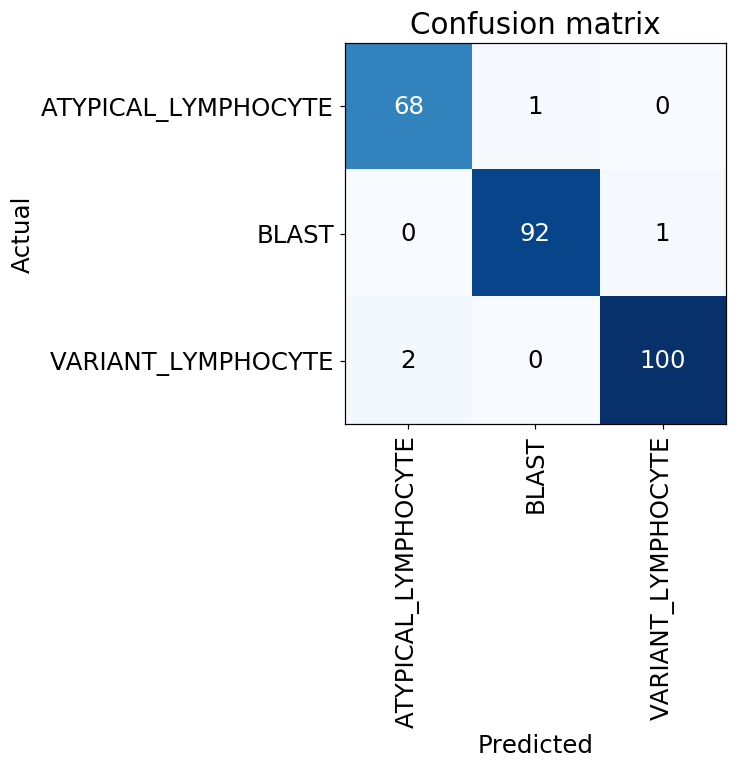

In [75]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
interp.plot_confusion_matrix(figsize=(7,7), dpi=110)

interp.plot_confusion_matrix(figsize=(7,7), dpi=110, normalize=True)

In [77]:
len(data_test.valid_ds)==len(losses)==len(idxs)

True